## Titanic analysis

In [44]:
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
train = pd.read_csv('./data/train.csv')

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
print('Training set Rows : ')
print(train.shape[0])
print('Columns : ')
print(train.shape[1])

Training set Rows : 
891
Columns : 
12


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Following are missing values

* Age
* Cabin
* Embarked

### Fill nulls in Age

In [49]:
train['Age'].fillna(train['Age'].mean(), inplace = True)

### Fill nulls in Embarked

In [50]:
most_freq_port = train['Embarked'].mode()[0]
train['Embarked'].fillna(most_freq_port, inplace = True)

In [51]:
train_describe_numeric = train.describe()
train_describe_numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Create Age_Group category

In [52]:
def getAgeGroup (age) :
    if age <= 10:
        return 1
    elif age <= 18:
        return 2
    elif age <= 28:
        return 3
    elif age <= 45:
        return 4
    elif age <= 65:
        return 5
    else:
        return 6

train[ 'Age_Group' ] = train[ 'Age' ].map(getAgeGroup)
train[ 'Age_Group' ].head()

0    3
1    4
2    3
3    4
4    4
Name: Age_Group, dtype: int64

In [53]:
print('So survival rate is ')
print(train_describe_numeric.loc['mean', 'Survived'])

So survival rate is 
0.383838383838


In [54]:
train_describe_categorical = train.describe(include=['O'])
train_describe_categorical

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"McGowan, Miss. Anna ""Annie""",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,646


### Find family size

In [55]:
train["Family_Size"] = train['SibSp'] + train['Parch'] + 1
train["Family_Size"].head()

0    2
1    2
2    1
3    2
4    1
Name: Family_Size, dtype: int64

### Create family_type category

In [56]:
def getFamilyType(size):
    if size == 1:
        return 1
    elif 2 <= size <= 4:
        return 2
    else:
        return 3

train['Family_Type'] = train['Family_Size'].map(getFamilyType)
train['Family_Type'].head()

0    2
1    2
2    1
3    2
4    1
Name: Family_Type, dtype: int64

### Convert gender to 1 / 0

In [57]:
train[ 'Sex' ] = train[ 'Sex' ].map( lambda s : 1 if s == 'male' else 0 )
train[ 'Sex' ].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

### Survival rate by Age_Group

In [58]:
survival_rate_by_age_group = train[['Age_Group', 'Survived']].groupby(['Age_Group'], as_index = False).mean()
survival_rate_by_age_group = survival_rate_by_age_group.sort_values(by = 'Survived', ascending = False)
survival_rate_by_age_group.head()

,Age_Group,Survived
0,1,0.593750
1,2,0.426667
4,5,0.389474
3,4,0.366197
2,3,0.349776


### Survival rate by class

In [59]:
survival_rate_by_class = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()
survival_rate_by_class = survival_rate_by_class.sort_values(by = 'Survived', ascending = False)
survival_rate_by_class

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


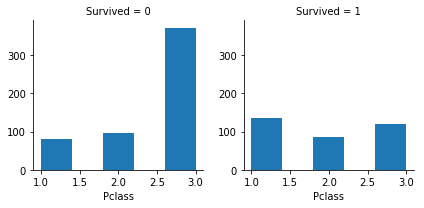

In [60]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(plt.hist, 'Pclass', bins = 5)

The upper class had a much higher chance of surviving the disaster

### Survival rate by gender 

In [61]:
survival_rate_by_gender = train[["Sex", "Survived"]].groupby(['Sex'], as_index = False).mean()
survival_rate_by_gender = survival_rate_by_gender.sort_values(by = 'Survived', ascending = False)
survival_rate_by_gender

,Sex,Survived
0,0,0.742038
1,1,0.188908


Women were much more likely to survive

### Survival rate by family size 

In [62]:
survival_rate_by_family_size = train[["Family_Size", "Survived"]].groupby(['Family_Size'], as_index = False).mean()
survival_rate_by_family_size = survival_rate_by_family_size.sort_values(by = 'Survived', ascending = False)
survival_rate_by_family_size

,Family_Size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


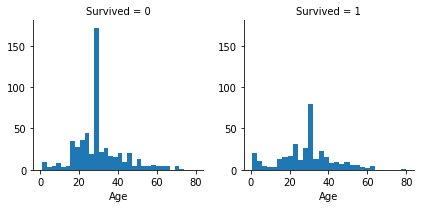

In [63]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(plt.hist, 'Age', bins = 30)

### Survival rate by Embarked

In [64]:
survival_rate_by_embarked = train[["Embarked", "Survived"]].groupby(['Embarked'], as_index = False).mean()
survival_rate_by_embarked = survival_rate_by_embarked.sort_values(by = 'Survived', ascending = False)
survival_rate_by_embarked

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Get dummies of Age_Group and Family_Type

In [65]:
train = pd.get_dummies(
    train, 
    columns = ['Age_Group', 'Family_Type', 'Sex', 'Pclass'], 
    prefix = ['Age_Group', 'Family_Type', 'Sex', 'Pclass'],
    drop_first = True
)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Name             891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         891 non-null object
Family_Size      891 non-null int64
Age_Group_2      891 non-null uint8
Age_Group_3      891 non-null uint8
Age_Group_4      891 non-null uint8
Age_Group_5      891 non-null uint8
Age_Group_6      891 non-null uint8
Family_Type_2    891 non-null uint8
Family_Type_3    891 non-null uint8
Sex_1            891 non-null uint8
Pclass_2         891 non-null uint8
Pclass_3         891 non-null uint8
dtypes: float64(2), int64(5), object(4), uint8(10)
memory usage: 85.3+ KB


In [66]:
columns_to_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Family_Size', 'Embarked', 'Age']

train.drop(
    columns_to_drop, 
    axis = 1, 
    inplace = True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived         891 non-null int64
Age_Group_2      891 non-null uint8
Age_Group_3      891 non-null uint8
Age_Group_4      891 non-null uint8
Age_Group_5      891 non-null uint8
Age_Group_6      891 non-null uint8
Family_Type_2    891 non-null uint8
Family_Type_3    891 non-null uint8
Sex_1            891 non-null uint8
Pclass_2         891 non-null uint8
Pclass_3         891 non-null uint8
dtypes: int64(1), uint8(10)
memory usage: 15.7 KB


### Split into X_train and y_train

In [67]:
y_train = train['Survived']

In [68]:
X_train = train.drop(
                [ 'Survived' ],
                axis = 1)

In [69]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [70]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
random_forest.score(X_train, y_train)

0.83726150392817056

### Prepare the test dataset

In [72]:
test = pd.read_csv('./data/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
X_test = []
#y_test => will be used by Kaggle to check my y_pred

In [74]:
y_pred = random_forest.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest